# Customer Segmentation:
 In this analysis we cluster customers on segments based on their behavior using the K-Means algorithm in Python.

In [45]:
# importing necesaary Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [46]:
# I took the datset from kaggle https://www.kaggle.com/code/fabiendaniel/customer-segmentation/data?select=data.csv
df=pd.read_csv(r'data.csv',encoding= 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [47]:
# checking the dataset size
df.shape

(541909, 8)

In [48]:
# checking for data type info of dataset 
df.info()
# from here we can also say that our dataset consist of some null values for customer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [49]:
# calculating how much null values present in data 
df.isnull().sum()
# find that so many null values for customers 

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [50]:
# Here we are analyzing our dataset based on customer buying behavior on the marketbecause of that reason i'm dropping those customers from final data that have null value
df = df[df['CustomerID'].notna()]

In [51]:
df.shape

(406829, 8)

In [52]:
# statistical analyzing for numerical column of data set
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


## RFM ( Recency, Frequency, Monetary Value)

*   Recency: How recently has the customer made a transaction with us
*   Frequency: How frequent is the customer in ordering/buying some product from us
*   Monetary: How much does the customer spend on purchasing products from us.


In [53]:
# Converting Invoice date to show date only

df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], errors='coerce')
df["InvoiceDate"] = df["InvoiceDate"].dt.date

# For finding total price with respect to its quantity
df["Totalprice"] = df["Quantity"] * df["UnitPrice"]

# Create date variable (having maximum date from invoice date) that records recency
import datetime
snapshot_date = max(df.InvoiceDate) + datetime.timedelta(days=1)

# Aggregate data with respect to each customer 
customers = df.groupby(['CustomerID']).agg({
                                              'InvoiceDate': lambda d: (snapshot_date - d.max()).days,
                                              'InvoiceNo': 'count',
                                              'Totalprice': 'sum'})
# Rename columns as per RFM 
customers.rename(columns = {'InvoiceDate': 'Recency',
                            'InvoiceNo': 'Frequency',
                            'Totalprice': 'MonetaryValue'}, inplace=True)
customers.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,2,0.00
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40


Now, the dataset consists of recency, frequency, and monetary value column. But we cannot use the dataset yet because of lots of variation into their values so, we have to preprocess the data more.

# Visualization RFM

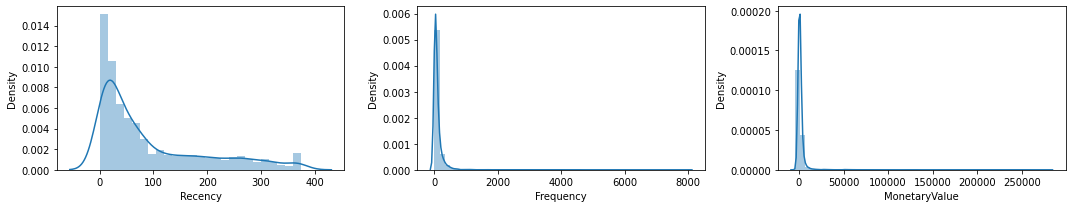

In [54]:
fig, ax = plt.subplots(1, 3, figsize=(15,3))
sns.distplot(customers['Recency'], ax=ax[0])
sns.distplot(customers['Frequency'], ax=ax[1])
sns.distplot(customers['MonetaryValue'], ax=ax[2])
plt.tight_layout()
plt.show()

From this visualization i observed data is not in symmetric form so, we have to transform the data, so it has a more symmetrical form.
To transform data into symmetrical form some of the methods given below that we can use to manage the skewness, they are-
*   log transformation
*   square root transformation
*   box-cox transformation
-   We can use these transformation if and only if the variable only has positive values that's why i'm checking only for Recency & Frequency col.

In [55]:
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(1, 3, figsize=(15,3))
    # sns.distplot(customers[x], ax=ax[0,0])
    sns.distplot(np.log(customers[x]), ax=ax[0]).set(title='Log Transformation')
    sns.distplot(np.sqrt(customers[x]), ax=ax[1]).set(title='Square Root Transformation')
    sns.distplot(stats.boxcox(customers[x])[0], ax=ax[2]).set(title='Box-Cox Transformation')
    plt.tight_layout()
    plt.show()
    
    print("Customers Skew value without Transformation : ",customers[x].skew().round(2))
    print("Customers Skew value with log Transformation : ",np.log(customers[x]).skew().round(2))
    print("Customers Skew value with sqrt Transformation : ",np.sqrt(customers[x]).skew().round(2))
    print("Customers Skew value with box-cox  Transformation : ",pd.Series(stats.boxcox(customers[x])[0]).skew().round(2))

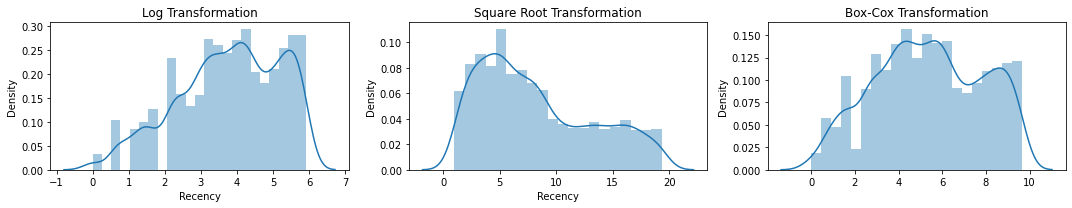

Customers Skew value without Transformation :  1.25
Customers Skew value with log Transformation :  -0.45
Customers Skew value with sqrt Transformation :  0.6
Customers Skew value with box-cox  Transformation :  -0.07


In [56]:
analyze_skewness('Recency')

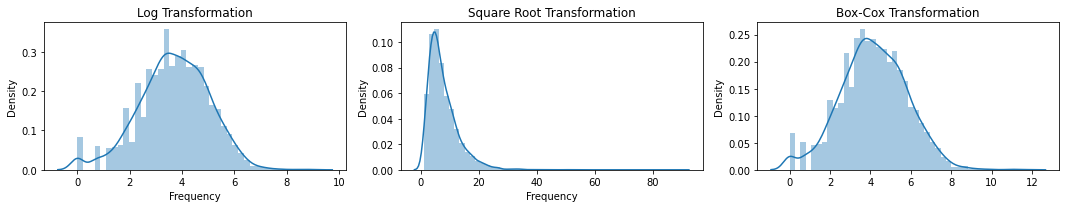

Customers Skew value without Transformation :  18.15
Customers Skew value with log Transformation :  -0.24
Customers Skew value with sqrt Transformation :  3.2
Customers Skew value with box-cox  Transformation :  0.0


In [57]:
analyze_skewness('Frequency')

From the above tramsformation visualization i decided box-cox transformation have more symmetrical form.
So, based onto these calculation, we will utilize variables that use box-cox transformations

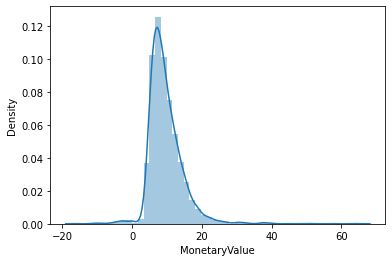

Customers Monetary value without Transformation :  21.71
Customers Monetary value with cubic root Transformation :  2.29


In [58]:
# To handle Monetary variable value, we can use cubic root transformation to the data, so the comparison looks like this,
sns.distplot(np.cbrt(customers['MonetaryValue']))#, ax=ax[1])
plt.show()
print("Customers Monetary value without Transformation : ",customers['MonetaryValue'].skew().round(2))
print("Customers Monetary value with cubic root Transformation : ",np.cbrt(customers['MonetaryValue']).skew().round(2))

In [59]:
# Transforming the RFM table with the help of above transformation calculated value
customers_rfm = pd.DataFrame()
customers_rfm["Recency"] = stats.boxcox(customers['Recency'])[0]
customers_rfm["Frequency"] = stats.boxcox(customers['Frequency'])[0]
customers_rfm["MonetaryValue"] = pd.Series(np.cbrt(customers['MonetaryValue'])).values
customers_rfm.tail()

,Recency,Frequency,MonetaryValue
4367,8.932980,2.460908,5.652483
4368,7.949051,2.058202,4.323541
4369,2.449000,2.762414,5.610440
4370,1.544575,8.057611,12.795376
4371,5.087438,4.808490,12.247810


In [60]:
# Still our dataset have huge variation so we normalize its mean value to 0 and variance to 1
# We have to normalize it. To normalize, we can use StandardScaler module from scikit-learn library
from sklearn.preprocessing import StandardScaler
# Initialize the Object
scaler = StandardScaler()
# Fit and Transform The Data
scaler.fit(customers_rfm)
customers_normalized = scaler.transform(customers_rfm)
# Assert that it has mean 0 and variance 1
print(customers_normalized.mean(axis = 0).round(2))
print(customers_normalized.std(axis = 0).round(2))


[-0.  0. -0.]
[1. 1. 1.]


In [61]:
pd.DataFrame(customers_normalized).head()

,0,1,2
0,1.606608,-2.098072,-1.925647
1,-1.696240,1.151346,1.330542
2,0.317615,-0.224316,0.507038
3,-0.669146,0.423978,0.488997
4,1.560253,-0.660498,-0.536848


# Modelling (K-Means Algorithm)

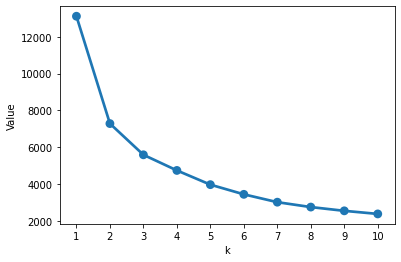

In [62]:
# for chossing k number 
from sklearn.cluster import KMeans
cluster_v = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalized)
    cluster_v[k] = kmeans.inertia_ 
plt.xlabel('k')
plt.ylabel('Value')
sns.pointplot(x=list(cluster_v.keys()), y=list(cluster_v.values()))
plt.show()

We will take the best parameter(inflamation point) by looking at where the k-value will have a linear trend on the next consecutive k. Based on our observation, the k-value of 3 is the best hyperparameter for our model because the next k-value tend to have a linear trend. 

In [63]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(customers_normalized)
# cluster Analysis
customers["Cluster"] = model.labels_
customers.head()

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12346.0,326,2,0.00,0
12347.0,3,182,4310.00,2
12348.0,76,31,1797.24,1
12349.0,19,73,1757.55,1
12350.0,311,17,334.40,0


We can summarize the RFM table based on clusters and calculate the mean of each variable also count so, we can easily figure that how many customer falls into which cluster

In [64]:
customers.groupby('Cluster').agg({
                                  'Recency':'mean',
                                  'Frequency':'mean',
                                  'MonetaryValue':['mean', 'count']}).round(2)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0        185.28     19.22        352.11  1659
1         42.91     67.52       1008.26  1934
2         18.48    313.69       7401.71   779

In [65]:
# Create the dataframe
df_normalized = pd.DataFrame(customers_normalized, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = customers.index
df_normalized['Cluster'] = model.labels_
df_normalized.head()

,Recency,Frequency,MonetaryValue,ID,Cluster
0,1.606608,-2.098072,-1.925647,12346.0,0
1,-1.696240,1.151346,1.330542,12347.0,2
2,0.317615,-0.224316,0.507038,12348.0,1
3,-0.669146,0.423978,0.488997,12349.0,1
4,1.560253,-0.660498,-0.536848,12350.0,0


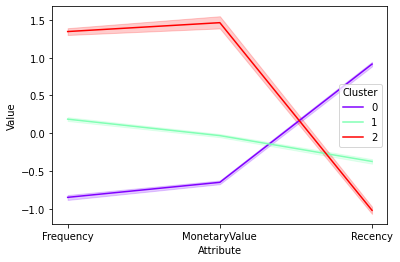

In [66]:

df = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Frequency','MonetaryValue','Recency'],
                      var_name='Attribute',
                      value_name='Value')
# Visualization
sns.lineplot('Attribute', 'Value', hue='Cluster', data=df,palette="rainbow")

With the help of above lineplot we can easily differentiate each segment. It describes more than we use the summarized table.
*   We infer that **cluster 0** is frequent, spend more, and they buy the product recently. Therefore, it could be the cluster of a **loyal customer.**
*   The **cluster 1** is less frequent, less to spend, but they buy the product recently. Therefore, it could be the cluster of **new customer.**
*   The **cluster 2** is less frequent, less to spend, and they buy the product at the old time. Therefore, it could be the cluster of **churned customers.**